**Sparks Foundation #6 task prediction using decision tree algorithm**

**Marwan Ahmed ElAgamy**

**1. Importing libraries**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from IPython.display import Image

**2. Load Dataset**

In [63]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**3. Exploring dataset types**

In [64]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**4. Checking for missing data**

In [65]:
df.isnull().values.any()

False

**5. Count of each species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


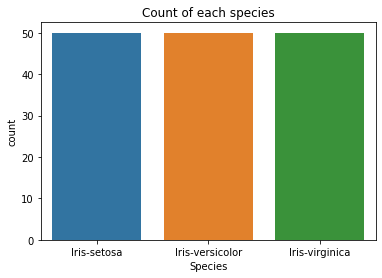

In [66]:
plt.title("Count of each species")
sns.countplot(df['Species'],label="Count")

**6.1 Graph between SepalLengthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


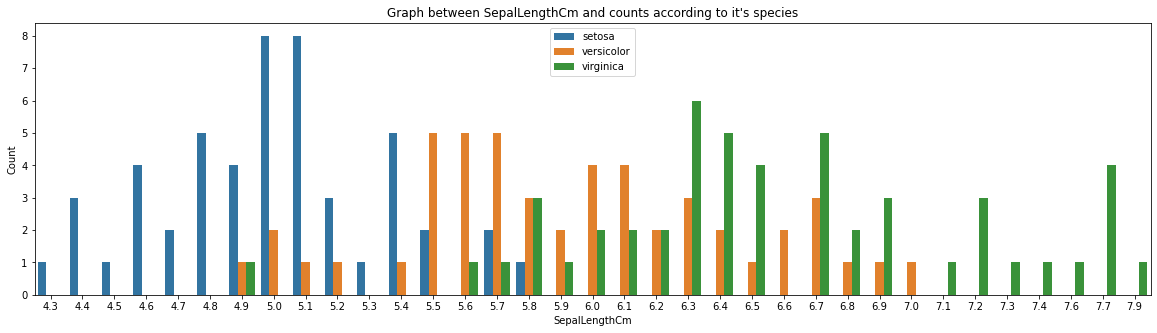

In [67]:
plt.figure(figsize=(20,5))
sns.countplot(df["SepalLengthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("SepalLengthCm")
plt.xticks()
plt.title("Graph between SepalLengthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.2 Graph between SepalWidthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


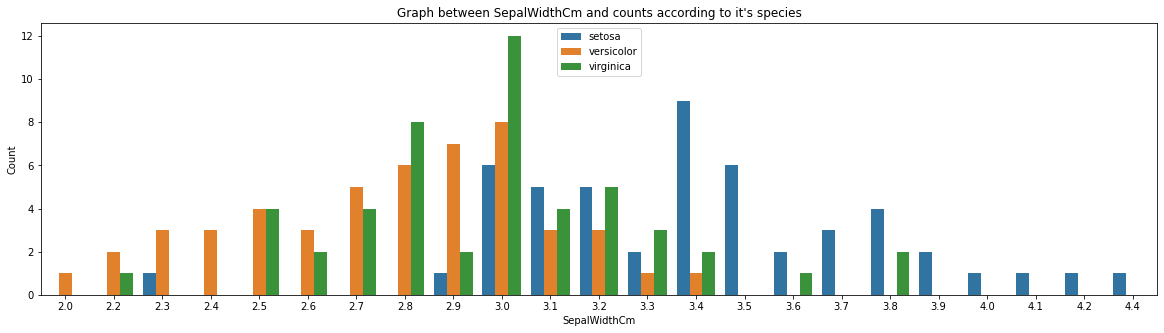

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(df["SepalWidthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("SepalWidthCm")
plt.xticks()
plt.title("Graph between SepalWidthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.3 Graph between PetalLengthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


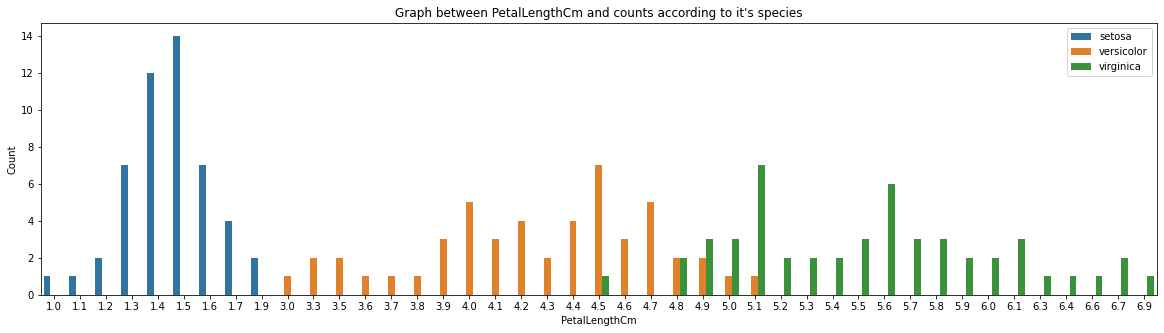

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalLengthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("PetalLengthCm")
plt.xticks()
plt.title("Graph between PetalLengthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.4 Graph between PetalWidthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


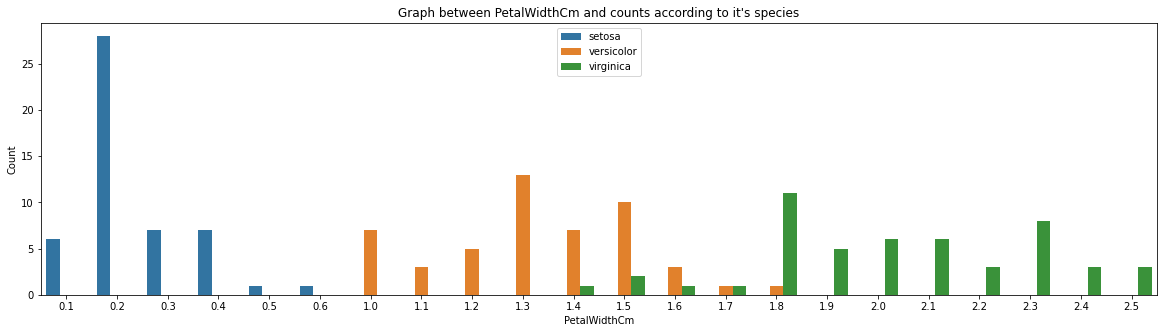

In [70]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalWidthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("PetalWidthCm")
plt.xticks()
plt.title("Graph between PetalWidthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**7. Preprocessing**

In [71]:
X  = df
y = df
X = X.drop(["Id","Species"],axis=1)
y = y.drop(["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],axis=1)
label_encoding_cols=['Species']
for i in label_encoding_cols:
    y[i]=y[i].astype("category")
    y[i]=y[i].cat.codes

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

**8. Gridsearch for decision tree parameters**

In [72]:
params = {
    'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
    'min_samples_leaf': [5, 10, 20, 40, 60, 80, 100],
    'min_samples_split': [5, 10, 20, 40, 60, 80, 100]
}

dt_grid = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_grid,param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 490 candidates, totalling 1470 fits


DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

**9. Model Bulding and showing results**

In [73]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,min_samples_split=5)
model = dt.fit(x_train, y_train)
dt_pred = model.predict(x_test)

print("---------------------------------------------------------------------")
print("Accuracy Score for Decision Tree :",accuracy_score(y_test,dt_pred))
print("---------------------------------------------------------------------")
print("\n")
print("classification stats for Decision Tree :\n\n",classification_report(y_test, dt_pred))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Accuracy Score for Decision Tree : 1.0
---------------------------------------------------------------------


classification stats for Decision Tree :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------


**10. Confusion matrix for decision tree**

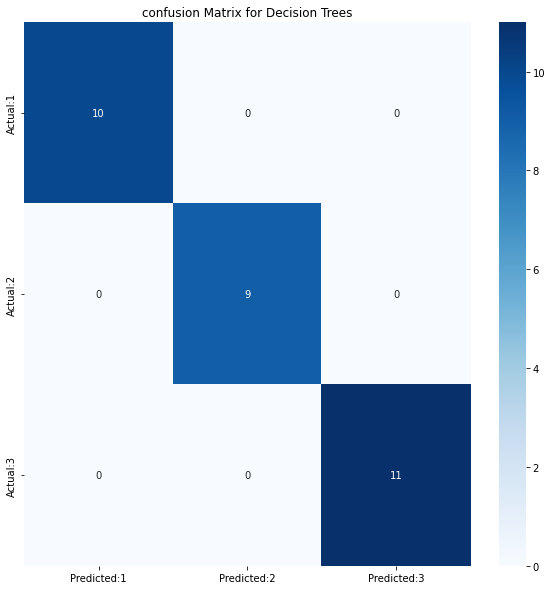

In [74]:
cm=confusion_matrix(y_test,dt_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix for Decision Trees")
plt.show()

**11. Visualization of decision tree**

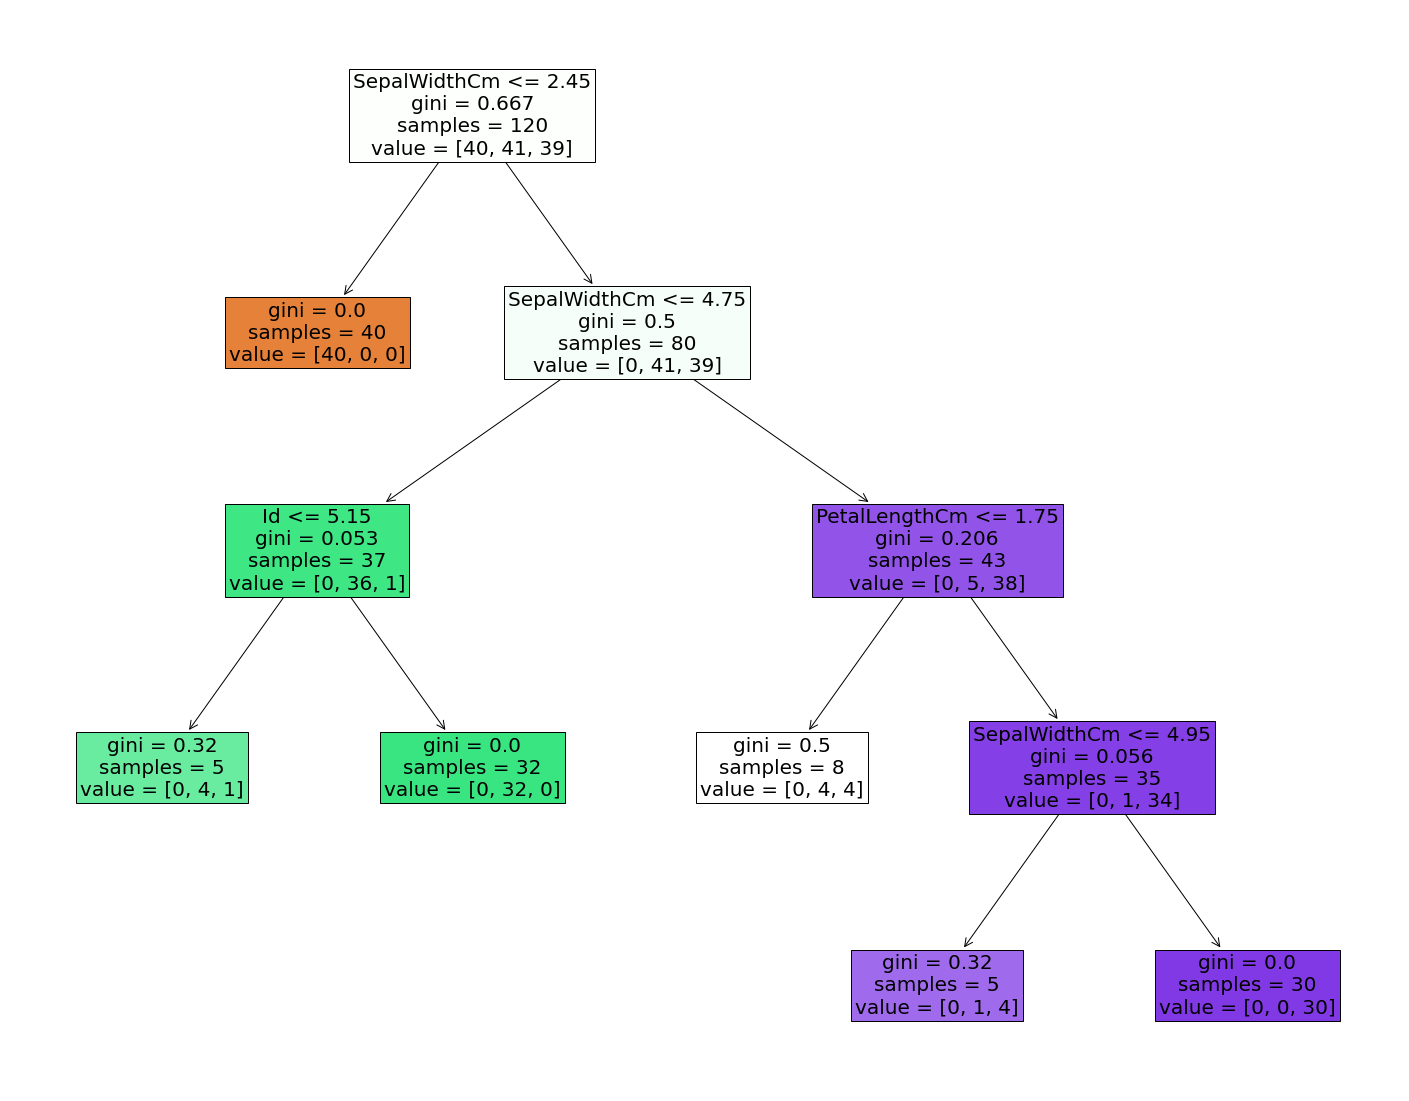

In [75]:
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(dt,feature_names=df.columns,filled=True,fontsize=20)
